[![Fixel Algorithms](https://i.imgur.com/AqKHVZ0.png)](https://fixelalgorithms.gitlab.io/)

#  Naive Bayes Classifier

## Sentiment Analysis

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 22/03/2024 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/AIProgram/2024_02/0042ClassifierNaiveBayes.ipynb)

In [1]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

import nltk
from nltk.corpus import stopwords, names
from nltk.stem import WordNetLemmatizer

# Image Processing

# Machine Learning

# Miscellaneous
import math
import os
from platform import python_version
import random
import timeit

# Typing
from typing import Callable, Dict, List, Optional, Set, Tuple, Union

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image
from IPython.display import display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout, SelectionSlider
from ipywidgets import interact

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

Code Notations:

```python
someVar    = 2; #<! Notation for a variable
vVector    = np.random.rand(4) #<! Notation for 1D array
mMatrix    = np.random.rand(4, 3) #<! Notation for 2D array
tTensor    = np.random.rand(4, 3, 2, 3) #<! Notation for nD array (Tensor)
tuTuple    = (1, 2, 3) #<! Notation for a tuple
lList      = [1, 2, 3] #<! Notation for a list
dDict      = {1: 3, 2: 2, 3: 1} #<! Notation for a dictionary
oObj       = MyClass() #<! Notation for an object
dfData     = pd.DataFrame() #<! Notation for a data frame
dsData     = pd.Series() #<! Notation for a series
hObj       = plt.Axes() #<! Notation for an object / handler / function handler
```

### Code Exercise

 - Single line fill

 ```python
 vallToFill = ???
 ```

 - Multi Line to Fill (At least one)

 ```python
 # You need to start writing
 ????
 ```

 - Section to Fill

```python
#===========================Fill This===========================#
# 1. Explanation about what to do.
# !! Remarks to follow / take under consideration.
mX = ???

???
#===============================================================#
```

In [2]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# Matplotlib default color palette
lMatPltLibclr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())

nltk.download('stopwords')
nltk.download('names')

[nltk_data] Downloading package stopwords to /home/vlad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package names to /home/vlad/nltk_data...
[nltk_data]   Package names is already up-to-date!


True

In [3]:
# Constants

DATA_FILE_ID        = r'12G6oUKCWzQnkDbv3TIcL9120YBdCwAmW'
L_DATA_FILE_NAME    = ['IMDBReviewsText.txt', 'IMDBReviewsLabels.txt']
D_CATEGORY          = {'positive': 1, 'negative': 0}

In [4]:
# Courses Packages
import sys
sys.path.append('../')
sys.path.append('../../')
sys.path.append('../../../')
from utils.DataManipulation import DownloadGDriveZip
from utils.DataVisualization import PlotConfusionMatrix, PlotLabelsHistogram


In [5]:
# General Auxiliary Functions


## Naive Bayes Classifier

The _Naive Bayes Classifier_ is built on the assumption conditional independence between every pair of features given the value of the class variable.  

Assume probabilistic model for the class given a set of features $\boldsymbol{x}$:

$$ P \left( y \mid {x}_{1}, \dots, {x}_{d} \right) = \frac{P \left( y \right) P( {x}_{1}, \dots, {x}_{d} \mid y)} {P \left( {x}_{1} , \dots, {x}_{d} \right)} $$

Using the naive conditional independence assumption yields:

$$ P \left( y \mid {x}_{1}, \dots, {x}_{d} \right) = \frac{P \left( y \right) \prod_{i = 1}^{d} P \left( {x}_{i} \mid y \right)} {P \left( {x}_{1}, \dots, {x}_{d} \right)} $$

Given $P \left( {x}_{1}, \dots, {x}_{d} \right)$ is a constant, one can optimize:

$$ \arg \max_{y} P \left( y \right) \prod_{i = 1}^{d} P \left( {x}_{i} \mid y \right) $$

The classifier model is set by the distribution set to the $i$ -th feature given the class: $P \left( {x}_{i} \mid y \right)$.

* <font color='brown'>(**#**)</font> In lectures, for continuous features, a more general case is described where the features are _Jointly Gaussian_.  
* <font color='brown'>(**#**)</font> The general case, where the joint distribution of the features (Which can be dependent) is unknown is usually modeled by a _Bayesian Net_.  
One way to implement such net is by a Neural Network Net. See [Neural Networks vs. Bayesian Networks](https://datascience.stackexchange.com/questions/9818) and [Ehud Reiter's Blog - Bayesian vs Neural Networks](https://ehudreiter.com/2021/07/05/bayesian-vs-neural-networks).  

### Sentiment Analysis

In this case highly polar reviews of movies will be analyzed for _Sentiment Analysis_.  
The categories will be _negative_ or _positive_ reviews.   

The RAW data is a review text.  
The process of the classification will be:

1. Download and Load the Data  
The data will be downloaded and parsed into 2 lists: Reviews, Labels.
2. Pre Process the Data  
The text data will be cleaned, the labels will be transformed into numeric values.
3. Feature Extraction  
The text will be transformed into _histogram_ like of the words in the review.
4. Classification  
The classification will be done using Multinomial Naive Bayes model.

* <font color='brown'>(**#**)</font> [Multinomial Distribution](https://en.wikipedia.org/wiki/Multinomial_distribution) is a generalization of the [Binomial Distribution](https://en.wikipedia.org/wiki/Binomial_distribution). It suits the case of counting the number of occurrence of the words. 
* <font color='brown'>(**#**)</font> A math deep introduction is given in [Michael Collins - The Naive Bayes Model, Maximum Likelihood Estimation and the EM Algorithm](http://www.cs.columbia.edu/~mcollins/em.pdf).

In [6]:
# Parameters

# Data
numSamplesRatio = 0.1

# Features Engineering
# Minimum Frequency of words
minDf = 1
# Maximum number of features (Histogram support)
numFeaturesMax = 500_000
minRatio = 2.5
maxRatio = 5 #<! No Effect (Visualization)

# Model
α = 1



## Generate / Load Data

Loading [Andrew Maas' Large Movie Review Dataset](http://ai.stanford.edu/~amaas/data/sentiment) data set.  
The original data was processed into 25,000 labeled reviews (See [Rockikz (`x4nth055`) - Sentiment Analysis Naive Bayes](https://github.com/x4nth055/sentiment_analysis_naive_bayes)).


In [7]:
# Download Data 

# Download the data from Google Drive
DownloadGDriveZip(fileId = DATA_FILE_ID, lFileCont = L_DATA_FILE_NAME)


Downloading...
From: https://drive.google.com/uc?id=12G6oUKCWzQnkDbv3TIcL9120YBdCwAmW
To: /data/solai/2024/03_ml/03_Statistical/mapClassifier/IMDBReviews.zip
100%|██████████| 11.4M/11.4M [00:01<00:00, 9.61MB/s]


In [8]:
# Load Data

# Read reviews - Python Context
with open(L_DATA_FILE_NAME[0]) as hFile:
    lReview = hFile.readlines() #<! Each review is a line

# Read labels - Python Context
with open(L_DATA_FILE_NAME[1]) as hFile:
    lLabels = hFile.readlines() #<! Each review is a line


print(f'Loaded {len(lReview)} reviews')
print(f'Loaded {len(lLabels)} labels')

Loaded 25000 reviews
Loaded 25000 labels


In [9]:
# Pre Processing
# 1. Remove leading and trailing spaces from text.
# 2. Convert the labels: 'negative' -> 0, 'positive' -> 1 (Numpy Array).

lReview = [reviewTxt.strip() for reviewTxt in lReview] #<! Remove leading and trailing whitespaces
vY = np.array([D_CATEGORY[labelTxt.strip()] for labelTxt in lLabels]) #<! 'negative' -> 0, 'positive' -> 1

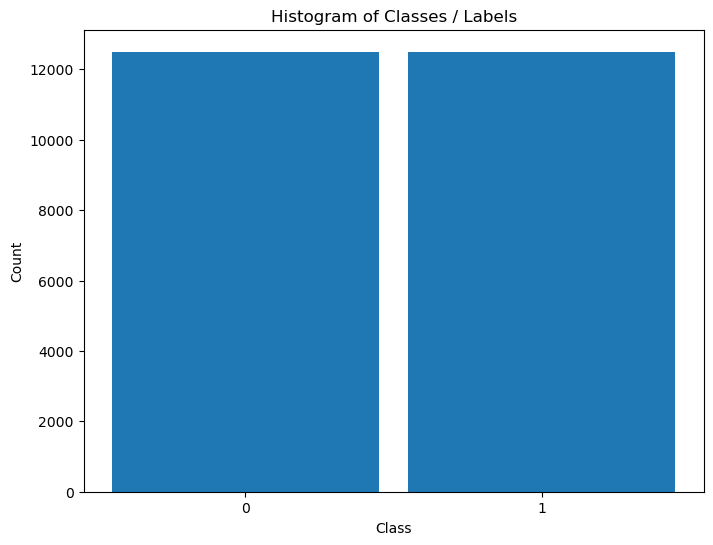

In [10]:
# Distribution of Labels

hA = PlotLabelsHistogram(vY)
plt.show()

### Train / Test Split   

Since the feature engineering will be mostly about counting and the distribution of the words, the split is done before the feature engineering.  
This is done to prevent the train data pollution / contamination (Also known as [_Data Leakage_ in Machine Learning](https://en.wikipedia.org/wiki/Leakage_(machine_learning))).

In [11]:
numClass = len(np.unique(vY))
lReviewTrain, lReviewTest, vYTrain, vYTest = train_test_split(lReview, vY, test_size = numSamplesRatio, shuffle = True, stratify = vY)

## Feature Engineering

For simple based text tasks, most used features are based on the histogram of the words per object.  
In general, the whole corpus of words in the data is described by a distribution.

* <font color='brown'>(**#**)</font> The most simple

In this case we'll use SciKit Learn [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) which learns the corpus of words.  
Then, in its transformation phase, build the histogram per object.  

In [12]:
# Build the Histogram Feature Vector

# List of words to avoid counting
lNames      = list(names.words())
lNames      = [name.lower() for name in lNames]
lStopWords  = list(stopwords.words())
lStopWords  = [word.lower() for word in lStopWords]
lIgnoreWords = list(ENGLISH_STOP_WORDS) + lNames + lStopWords

# The Count Object 
oCntVec = CountVectorizer(strip_accents = 'ascii', stop_words = lIgnoreWords, min_df = minDf, max_features = numFeaturesMax)
mXTrain = oCntVec.fit_transform(lReviewTrain) #<! Fit & Transform

/data/solai/venvMamabaFixel/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['acaba', 'acesti', 'aci', 'aiba', 'aixi', 'aixo', 'aldiz', 'altal', 'altalaban', 'altms', 'ambdos', 'amig', 'aqui', 'arasnda', 'arrol', 'artq', 'aslnda', 'astia', 'ate', 'aveti', 'avra', 'avro', 'azert', 'aztan', 'azutan', 'bade', 'bae', 'baiknya', 'baizik', 'bar', 'baz', 'belul', 'berkali', 'bes', 'bilr', 'birkac', 'birsey', 'bizlr', 'blk', 'bos', 'brzcas', 'brzkone', 'bukatzeko', 'bunlarn', 'butun', 'bzi', 'bzn', 'caci', 'cadascu', 'carei', 'caror', 'carui', 'catva', 'cem', 'cemer', 'cemerkoli', 'cemu', 'cemur', 'cemurkoli', 'ceprav', 'ceravno', 'cesa', 'cesarkoli', 'cetrta', 'cetrte', 'cetrtega', 'cetrtem', 'cetrtemu', 'cetrti', 'cetrtih', 'cetrtim', 'cetrtima', 'cetrtimi', 'cetrto', 'cetudi', 'cez', 'cezenj', 'ceznje', 'cigar', 'cigav', 'cigava', 'cigave', 'cigavega', 'c

The features matrix is large and sparse.  
The next move is to select important features.

The concept, per feature, if it has some tendency to either class.  
It makes sense since the assumption is each feature is independent of other given class.

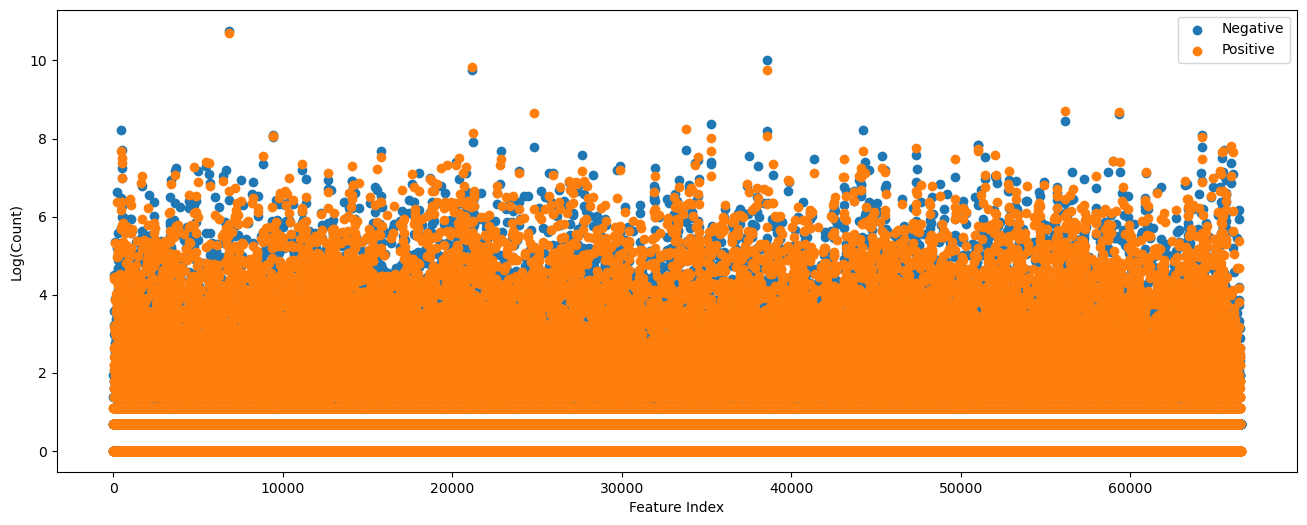

In [13]:
# The Class Ratio per Feature

numFeatures = len(oCntVec.vocabulary_)
lFeatNames  = list(oCntVec.get_feature_names_out())
vClassRatio = np.zeros(numFeatures)

# Number of occurrence per class
vSumNeg = mXTrain.T @ (vYTrain == D_CATEGORY['negative'])
vSumPos = mXTrain.T @ (vYTrain == D_CATEGORY['positive'])

hF, hA = plt.subplots(figsize = (16, 6))
hA.scatter(range(numFeatures), np.log1p(vSumNeg), color = lMatPltLibclr[0], label = 'Negative')
hA.scatter(range(numFeatures), np.log1p(vSumPos), color = lMatPltLibclr[1], label = 'Positive')
hA.set_xlabel('Feature Index')
hA.set_ylabel('Log(Count)')
hA.legend();



In [14]:
# Ratio per Feature

# The ratio between the counts.
# To make it symmetric, we'll take the maximum of both sides.
vClsRatio = np.nanmax(np.column_stack((vSumNeg / (vSumPos + (1 / minRatio)), vSumPos / (vSumNeg + (1 / minRatio)))), axis = 1)
# Limit the ratio to [0, 2]
vClsRatio = np.clip(vClsRatio, a_min = 0, a_max = maxRatio)

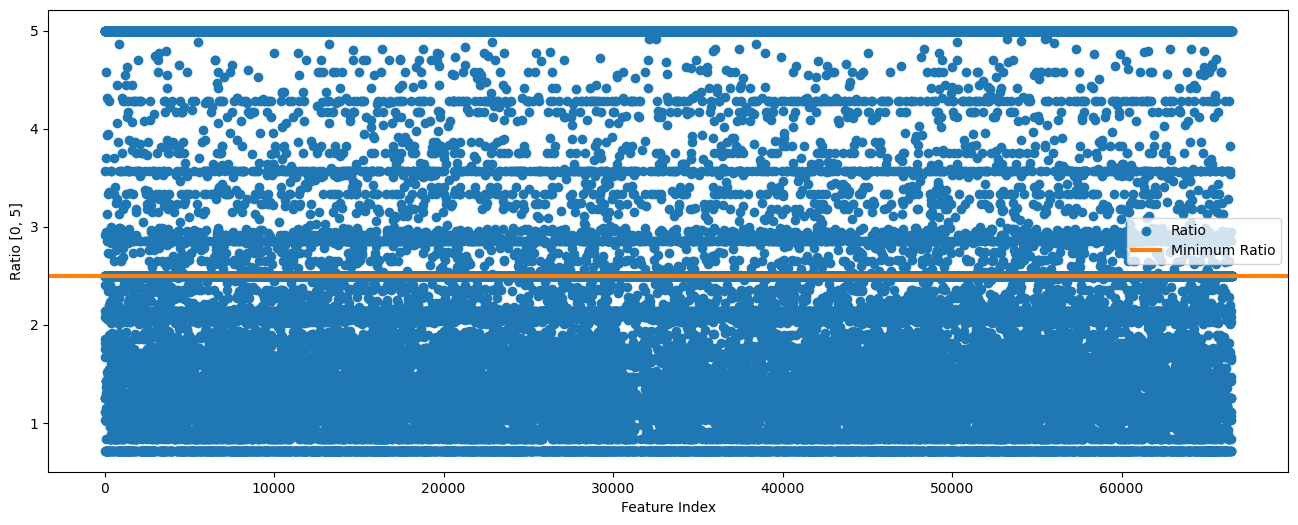

In [15]:
# Plot the Ratio
hF, hA = plt.subplots(figsize = (16, 6))
hA.scatter(range(numFeatures), vClsRatio, color = lMatPltLibclr[0], label = 'Ratio')
hA.axhline(y = minRatio, lw = 3, color = lMatPltLibclr[1], label = 'Minimum Ratio')
hA.set_xlabel('Feature Index')
hA.set_ylabel(f'Ratio [0, {maxRatio}]')
hA.legend();


Now, we build the words dictionary based on the selected words only.

In [16]:
# Words Dictionary

lDicWord = list(oCntVec.get_feature_names_out()[vClsRatio >= minRatio])

In [18]:
lDicWord

['aaa',
 'aaaaaaah',
 'aaaaah',
 'aaaaatch',
 'aaaand',
 'aaaarrgh',
 'aaah',
 'aaaugh',
 'aachen',
 'aada',
 'aadha',
 'aag',
 'aage',
 'aaghh',
 'aah',
 'aahhh',
 'aaip',
 'aaja',
 'aaker',
 'aakrosh',
 'aaliyah',
 'aames',
 'aankh',
 'aapke',
 'aapkey',
 'aardman',
 'aardvarks',
 'aargh',
 'aarrrgh',
 'aatish',
 'aauugghh',
 'aavjo',
 'aaww',
 'abadi',
 'abahy',
 'abanazer',
 'abanks',
 'abas',
 'abashed',
 'abashidze',
 'abating',
 'abattoirs',
 'abba',
 'abbad',
 'abbots',
 'abbu',
 'abcd',
 'abdic',
 'abdicates',
 'abdicating',
 'abdomen',
 'abdominal',
 'abdu',
 'abductee',
 'abductions',
 'abductors',
 'abercrombie',
 'abernathy',
 'aberystwyth',
 'abets',
 'abetted',
 'abetting',
 'abeyance',
 'abgail',
 'abhay',
 'abhays',
 'abhijeet',
 'abhimaan',
 'abhisheh',
 'abhishek',
 'abhorrence',
 'abhorrent',
 'abhors',
 'abi',
 'abides',
 'abigil',
 'abilityof',
 'abishai',
 'abishek',
 'abject',
 'abjectly',
 'abkani',
 'ably',
 'abm',
 'abnormal',
 'abnormality',
 'abodes',
 'abo

In [20]:
# Extract Features

# The Count Object 
oCntVec = CountVectorizer(strip_accents = 'ascii', vocabulary = lDicWord)
mXTrain = oCntVec.fit_transform(lReviewTrain) #<! Fit & Transform
mXTest  = oCntVec.fit_transform(lReviewTest) #<! Fit & Transform

In [21]:
# Train Test Split

print(f'The training features data shape: {mXTrain.shape}')
print(f'The training labels data shape: {vYTrain.shape}')
print(f'The test features data shape: {mXTest.shape}')
print(f'The test labels data shape: {vYTest.shape}')
print(f'The unique values of the labels: {np.unique(vY)}')

The training features data shape: (22500, 42550)
The training labels data shape: (22500,)
The test features data shape: (2500, 42550)
The test labels data shape: (2500,)
The unique values of the labels: [0 1]


## Classifier Model

There are 2 common Naive Bayes Models:

1. Gaussian Naive Bayes  
   Models each **independent** feature by $P \left( {x}_{i} \mid y \right) = \frac{1}{\sqrt{2 \pi {\sigma}_{y}^{2}}} \exp \left( -\frac{{\left( {x}_{i} - {\mu}_{y} \right)}^{2}}{2 {\sigma}_{y}^{2}}\right)$.  
   The features are assumed to be continuous.  
   It is the _go to_ choice for the case of continuous variables.  
   It has some limitation for the case of bounded continuous variables.  
   Implemented by [`GaussianNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html).
2. Bernoulli Naive Bayes  
   Models each **independent** feature by $P \left( {x}_{i} \mid y \right) = P \left( {x}_{i} \mid y \right) {x}_{i} + \left( 1 - P \left( {x}_{i} \mid y \right) \right) \left( 1 - {x}_{i} \right)$.  
   Models the probability of the _occurrence_ of the feature per class.  
   Assumes each feature is binary. It explicitly punishes for non _occurrence_.  
   Implemented by [`BernoulliNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html).
3. Multinomial Naive Bayes  
   Models each **independent** feature by $P \left( {x}_{1}, {x}_{2}, \dots, {x}_{d} \mid y \right) = \frac{d!}{{x}_{1}! {x}_{2}! \cdots {x}_{d}!} {p}_{1}^{{x}_{1}} {p}_{2}^{{x}_{2}} \cdots {p}_{d}^{{x}_{d}}$.  
   Models the counting of the feature per class.  
   Assumes each feature is non negative integer.  
   Implemented by [`MultinomialNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html).


* <font color='brown'>(**#**)</font> In lectures, the Gaussian Model does not assume independence of the features as above.  
* <font color='brown'>(**#**)</font> Though the _Multinomial Naive Bayes_ assume counts, in the context of text features, it is known to work well with [_Term Frequency - Inverse Document Frequency_](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) (TF-IDF) features as well.  
   See [How to Use TFIDF Vectors with Multinomial Naive Bayes](https://stackoverflow.com/questions/43237286).
* <font color='brown'>(**#**)</font> The _Multinomial Naive Bayes_ sets the probability according to the counts, the more the better. The _Bernoulli Naive Bayes_ sets the probability based on occurrence, it _punishes_ if there is no occurrence. Hence _Bernoulli Naive Bayes_ has the benefit of explicitly modelling the absence of terms. It implies that a _Multinomial Naive Bayes_ classifier with frequency counts truncated to one is not equivalent of _Bernoulli Naive Bayes_ classifier. See [Difference Between Bernoulli and Multinomial Naive Bayes](https://datascience.stackexchange.com/questions/27624).  

In the case above, to match the counts the _Multinomial Naive Bayes_ classifier will be used.

* <font color='brown'>(**#**)</font> Some advantages of NB Classifiers:
  * Easy to train and predict with decent results in many cases. 
  * Usually, have a closed form solution for their parameters. 
  * Can handle new data efficiently (See the `partial_fit` method). 
  * Can handle mixed type of features inherently.
* <font color='brown'>(**#**)</font> Some disadvantages of NB Classifiers: 
  * Can not be extended by _Ensembling_, _Boosting_, _Bagging_ as there is no variance to reduce.
  * Multinomial model assumes the counts will be similar in train and test sets (Otherwise, requires smoothing).
  * Performance degrades as the features becomes more dependent.
  * Highly sensitive to imbalanced data.

* <font color='red'>(**?**)</font> How mixed features, continuous, counts and binary, can be handled?


--- multiply the separated probabilities of the same type aggragate; 

In [ ]:
# NB Classfier Model
oMultNomNBcls = MultinomialNB(alpha = α)
oMultNomNBcls = oMultNomNBcls.fit(mXTrain, vYTrain)

In [ ]:
# Performance Train Data

vHatY = oMultNomNBcls.predict(mXTrain)
vYGt  = vYTrain

valAcc = np.mean(vHatY == vYGt)
valPrecision, valRecall, valF1, _ = precision_recall_fscore_support(vYGt, vHatY, pos_label = 1, average = 'binary')

print(f'Accuracy  = {valAcc:0.3f}')
print(f'Precision = {valPrecision:0.3f}')
print(f'Recall    = {valRecall:0.3f}'   )
print(f'F1 Score  = {valF1:0.3f}'       )

dScore = {'Accuracy': valAcc}

hF, hA = plt.subplots(figsize = (8, 8))
PlotConfusionMatrix(vYGt, vHatY, normMethod = 'true', hA = hA, dScore = dScore, valFormat = '0.1%') #<! The accuracy should be >= than above!
plt.show()

In [ ]:
# Performance Test Data

vHatY = oMultNomNBcls.predict(mXTest)
vYGt  = vYTest

valAcc = np.mean(vHatY == vYGt)
valPrecision, valRecall, valF1, _ = precision_recall_fscore_support(vYGt, vHatY, pos_label = 1, average = 'binary')

print(f'Accuracy  = {valAcc:0.3f}')
print(f'Precision = {valPrecision:0.3f}')
print(f'Recall    = {valRecall:0.3f}'   )
print(f'F1 Score  = {valF1:0.3f}'       )

dScore = {'Accuracy': valAcc}

hF, hA = plt.subplots(figsize = (8, 8))
PlotConfusionMatrix(vYGt, vHatY, normMethod = 'true', hA = hA, dScore = dScore, valFormat = '0.1%') #<! The accuracy should be >= than above!
plt.show()


* <font color='green'>(**@**)</font> Redo the exercise using TF-IDF. See SciKit Learn's [`TfidfTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html) and [`TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).
* <font color='green'>(**@**)</font> Redo the exercise using _Bernoulli Naive Bayes_ classifier. Adjust the features accordingly.
* <font color='green'>(**@**)</font> Try to improve results for accuracy. You may use `NLTK` Lemmatizer (`WordNetLemmatizer`).
* <font color='brown'>(**#**)</font> You may read about [The Difference Between a Bayesian Network and a Naive Bayes Classifier](https://stackoverflow.com/questions/12298150).  
  It has a great example on the _XOR Problem_ and the problem with the assumption of feature independence.
* <font color='brown'>(**#**)</font> You may read about [The Difference Between a Bayesian Network and a Naive Bayes Classifier](https://stats.stackexchange.com/questions/212240) (Different source).
* <font color='brown'>(**#**)</font> You may read about [Bayesian Neural Networks: Implementing, Training, Inference With the JAX Framework](https://neptune.ai/blog/bayesian-neural-networks-with-jax).

* <font color='brown'>(**#**)</font> To work with mixed features:
  1. Build a Multinomial NB classifier for the _count based features_.
  2. Build a Bernoulli NB classifier using the _binary features_.
  3. Build a Gaussian NB classifier using the _continuous features_.
  4. Multiply the probabilities of each model to find the maximum probability based on all features (Using the **independence assumption).

</br>

* <font color='brown'>(**#**)</font> Categorical features can be transformed into counts using _dummy variables_.
* <font color='brown'>(**#**)</font> Some continuous features should be engineered to better suit a Gaussian model (Like `log()`).